In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [10]:
df = pd.read_csv("full_data.csv", index_col="tpep_pickup_datetime", parse_dates=True).sort_index(ascending=True)
df.head()

,tip_amount,Number_of_fares,is_weekend,is_holiday
tpep_pickup_datetime,,,,
2022-01-24 00:00:00,2.00,13,0,0
2022-01-24 00:30:00,2.08,15,0,0
2022-01-24 01:00:00,2.36,7,0,0
2022-01-24 01:30:00,2.50,5,0,0
2022-01-24 02:00:00,1.18,6,0,0


### Visualize first week of data to observe difference between weekday and weekend

Text(0, 0.5, 'Number of Fares')

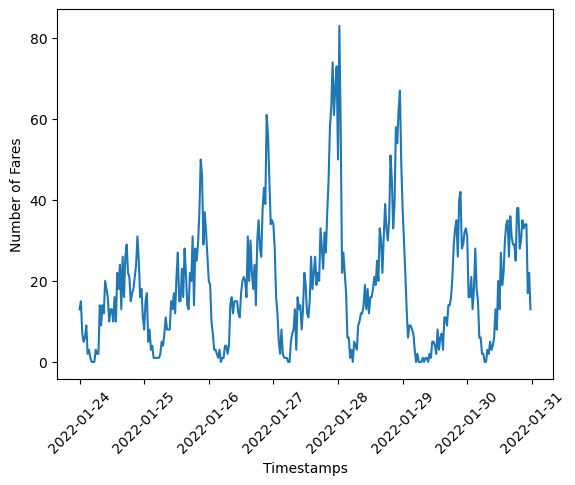

In [12]:
df_week = df.iloc[:336]
plt.plot(df_week["Number_of_fares"])
plt.xlabel("Timestamps")
plt.xticks(rotation=45)
plt.ylabel("Number of Fares")


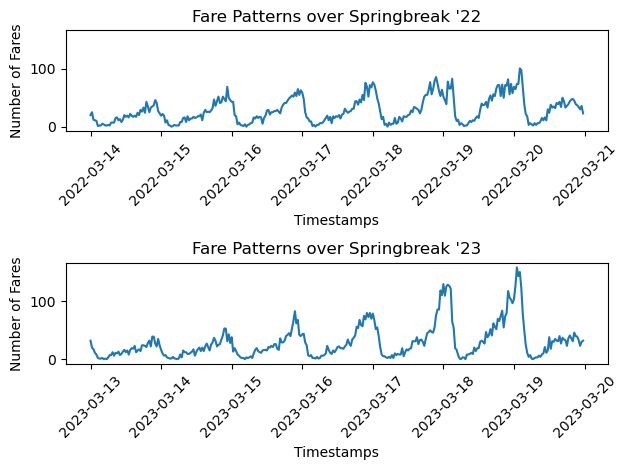

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True)
df_springbreak22 = df[df["is_holiday"] == True].loc["2022"]

#plt.xticks(rotation=45)
ax1.plot(df_springbreak22["Number_of_fares"])
ax1.set_title("Fare Patterns over Springbreak '22")
ax1.set_xlabel("Timestamps")
#ax1.set_xticklabels(labels=df_springbreak22["Number_of_fares"].index, rotation=45)
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel("Number of Fares")

df_springbreak23 = df[df["is_holiday"] == True].loc["2023"]
ax2.plot(df_springbreak23["Number_of_fares"])
ax2.set_title("Fare Patterns over Springbreak '23")
ax2.set_xlabel("Timestamps")
ax2.tick_params(axis='x', rotation=45)
#ax2.set_xticklabels(rotation=45)
ax2.set_ylabel("Number of Fares")
plt.tight_layout()

### The overall time-series reduced to 12-hour intervals to see overall patterns

In [46]:
spring_2022 = ['2022-03-14', '2022-03-20']
spring_2023 = ['2023-03-13', '2023-03-19']

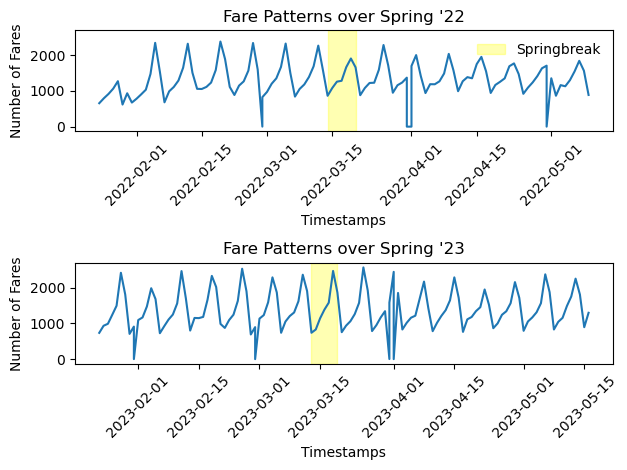

In [55]:
startdate_22, startdate22 = spring_2022
data4h = pd.read_csv("full_dataDay.csv", index_col="tpep_pickup_datetime", parse_dates=True).sort_index(ascending=True)
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True)
data4h_2022 = data4h.loc["2022"]
ax1.plot(data4h_2022["Number_of_fares"])
ax1.axvspan(startdate_22, startdate22, color='yellow', alpha=0.3, label="Springbreak")
ax1.set_title("Fare Patterns over Spring '22")
ax1.set_xlabel("Timestamps")
#ax1.set_xticklabels(labels=df_springbreak22["Number_of_fares"].index, rotation=45)
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel("Number of Fares")
ax1.legend(frameon=False, loc="upper right")

startdate_23, startdate23 = spring_2023
data4h_2023 = data4h.loc["2023"]
ax2.plot(data4h_2023["Number_of_fares"])
ax2.axvspan(startdate_23, startdate23, color='yellow', alpha=0.3, label="Springbreak")
ax2.set_title("Fare Patterns over Spring '23")
ax2.set_xlabel("Timestamps")
ax2.tick_params(axis='x', rotation=45)
#ax2.set_xticklabels(rotation=45)
ax2.set_ylabel("Number of Fares")
#ax2.legend(frameon=False)
plt.tight_layout()

We observe that there's not much difference over the spring break or weekends. The Seasonality is daily.